In [11]:
%pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [10]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

In [11]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


In [12]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    result = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,result

In [13]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [14]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,110,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121,122,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,76),thickness=2,circle_radius=4))
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [15]:
def extract_keypoints(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility]for res in result.pose_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(33*4)
    lh = np.array([[res.x,res.y,res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x,res.y,res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(1404)
    rh = np.array([[res.x,res.y,res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh,face,rh])

In [17]:
DATA_PATH = os.path.join('MP_DATA')
print(DATA_PATH)
actions = np.array(['hello','thanks','iloveyou'])
no_sequence = 30
sequence_length = 30

MP_DATA


In [18]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            path = os.path.join(DATA_PATH,action,str(sequence))
            print(path)
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
            

MP_DATA\hello\0
MP_DATA\hello\1
MP_DATA\hello\2
MP_DATA\hello\3
MP_DATA\hello\4
MP_DATA\hello\5
MP_DATA\hello\6
MP_DATA\hello\7
MP_DATA\hello\8
MP_DATA\hello\9
MP_DATA\hello\10
MP_DATA\hello\11
MP_DATA\hello\12
MP_DATA\hello\13
MP_DATA\hello\14
MP_DATA\hello\15
MP_DATA\hello\16
MP_DATA\hello\17
MP_DATA\hello\18
MP_DATA\hello\19
MP_DATA\hello\20
MP_DATA\hello\21
MP_DATA\hello\22
MP_DATA\hello\23
MP_DATA\hello\24
MP_DATA\hello\25
MP_DATA\hello\26
MP_DATA\hello\27
MP_DATA\hello\28
MP_DATA\hello\29
MP_DATA\thanks\0
MP_DATA\thanks\1
MP_DATA\thanks\2
MP_DATA\thanks\3
MP_DATA\thanks\4
MP_DATA\thanks\5
MP_DATA\thanks\6
MP_DATA\thanks\7
MP_DATA\thanks\8
MP_DATA\thanks\9
MP_DATA\thanks\10
MP_DATA\thanks\11
MP_DATA\thanks\12
MP_DATA\thanks\13
MP_DATA\thanks\14
MP_DATA\thanks\15
MP_DATA\thanks\16
MP_DATA\thanks\17
MP_DATA\thanks\18
MP_DATA\thanks\19
MP_DATA\thanks\20
MP_DATA\thanks\21
MP_DATA\thanks\22
MP_DATA\thanks\23
MP_DATA\thanks\24
MP_DATA\thanks\25
MP_DATA\thanks\26
MP_DATA\thanks\27
MP_DAT

In [20]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequence):
            for frame_num in range(sequence_length):
                ret,frame = cap.read()
                image,result = mediapipe_detection(frame,holistic)
                draw_styled_landmarks(image,result)
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frame for {} Video number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frame for {} Video number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

                cv2.imshow('Open CV feed',image)
                keypoints = extract_keypoints(result)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                if(cv2.waitKey(10) & 0xFF == ord('q')):
                    break
        
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num,label in enumerate(actions)}

In [21]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            res = np.load(path)
            window.append(res);
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
x=np.array(sequences)
y = to_categorical(labels).astype(int)
print(x.shape)
print(y.shape)
y

(90, 30, 1662)
(90, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)

In [25]:
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [17]:
log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [18]:
MyModel = Sequential()
MyModel.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
MyModel.add(LSTM(128,return_sequences=True,activation='relu'))
MyModel.add(LSTM(64,return_sequences=False,activation='relu'))
MyModel.add(Dense(64,activation='relu'))
MyModel.add(Dense(32,activation='relu'))
MyModel.add(Dense(actions.shape[0],activation='softmax'))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
res = [0.7, 0.2, 0.1]
actions[np.argmax(res)]

'hello'

In [20]:
MyModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [21]:
MyModel.fit(x_train, y_train,  epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - categorical_accuracy: 0.3229 - loss: 2.7413
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.4070 - loss: 11.1337
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 0.3248 - loss: 12.7264
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 0.4951 - loss: 9.0892
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - categorical_accuracy: 0.2896 - loss: 13.5937
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 0.2877 - loss: 34.9028
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 0.4226 - loss: 9.1840
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 0.3855 - loss: 12.3888
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - categorical_accuracy: 0.3855 - loss: 14.6488
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - categorical_accuracy: 0.3249 - loss: 7.8579
Epoch 11/200

KeyboardInterrupt: 

In [22]:
MyModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [23]:
res = MyModel.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [32]:
actions[np.argmax(res[3])]

'thanks'

In [33]:
actions[np.argmax(y_test[3])]

'thanks'

In [2]:
MyModel.save('myModel.h5')

NameError: name 'MyModel' is not defined

In [26]:
from keras.models import load_model
MyModel = load_model('MyModel.h5')


In [27]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix

In [28]:
yhat=MyModel.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 601ms/step


In [29]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [30]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[59,  0],
        [ 5, 21]],

       [[55,  1],
        [ 0, 29]],

       [[50,  5],
        [ 1, 29]]], dtype=int64)

In [31]:
accuracy_score(ytrue,yhat)

0.9294117647058824

In [32]:
from scipy import stats

colors=[(245,117,16),(117,245,16),(16,117,245)]
def prob_viz(res,actions,input_frame,colors):
    output_frame=input_frame.copy()
    for num,prob in enumerate(res):
        cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
        cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    return output_frame

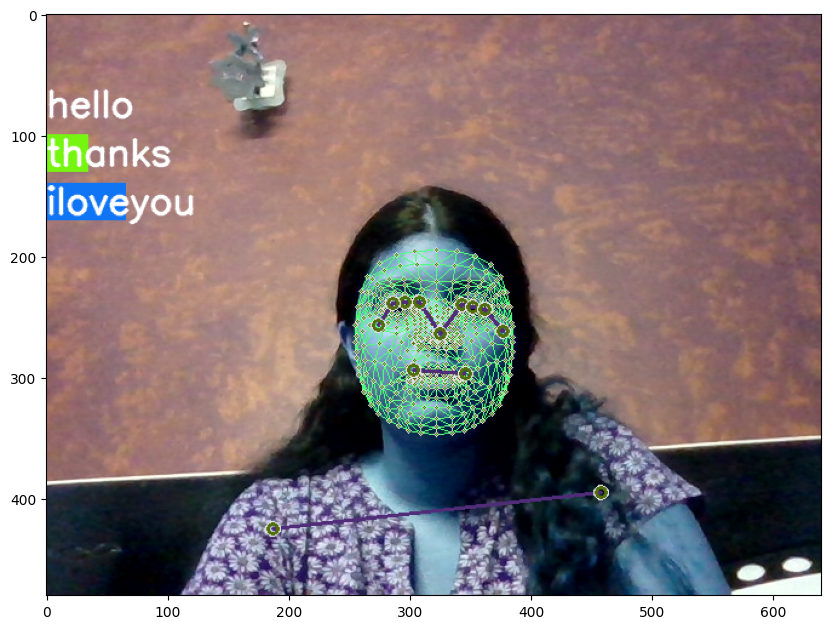

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res,actions,image,colors))

In [36]:
sequence=[]
sentence=[]
predictions=[]
threshold=0.6


cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret,frame=cap.read()       
        
        # Detections
        
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        draw_styled_landmarks(image,results)
        
        # Prediction 
        
        keypoints=extract_keypoints(results)
        sequence.append(keypoints)
        sequence=sequence[-30:]
        if len(sequence)==30:
            res = MyModel.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        # Viz for the model
        
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)]!= sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                    
            if len(sentence) > 5:
                sentence=sentence[-5:]
                
             # Viz Probability
            image= prob_viz(res,actions,image,colors)
              
        cv2.rectangle(image, (0,0), (640, 40), (245,117,16), -1)
        cv2.putText(image,''.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2,cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break   
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 